In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Đoc và chia dữ liệu
df = pd.read_excel("../Data/Cutomer_Churn.xls");
X = df[:][["Age","Tenure","Balance","HasCrCard","IsActiveMember","EstimatedSalary"]]
y = df[:]["Exited"]

In [13]:
from sklearn.model_selection import train_test_split
#Chia dữ liệu thành tập Train và Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500)

--------------------Trước khi Xử lí dữ liệu-----------------------------
Kết quả sau khi Test: 80.20 %


c:\Users\tanir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


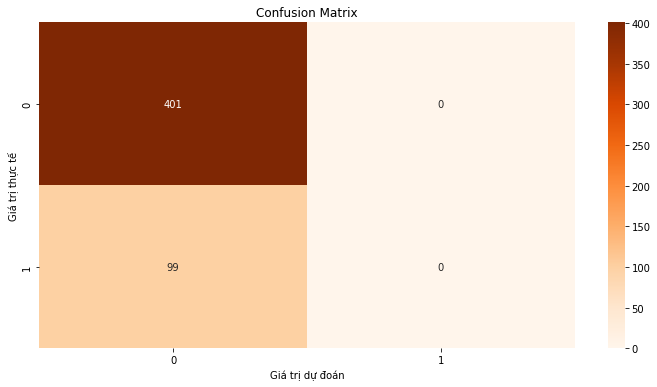

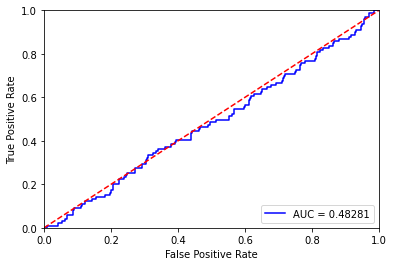

In [18]:
from sklearn.metrics import roc_curve, auc

    
svm = LinearSVC()
    
#Huấn luyện
svm.fit(X_train, y_train)
#Test
y_pred = svm.predict(X_test)
print("--------------------Trước khi Xử lí dữ liệu-----------------------------")
print("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
    
#Confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực tế")
plt.xlabel("Giá trị dự đoán")
plt.show()
    
#ROC
y_pred_proba = svm._predict_proba_lr(X_test)[::,1]
fpr, tpr, _ =roc_curve(y_test,  y_pred_proba)
plot = auc(fpr, tpr)
#create ROC curve
plt.plot(fpr,tpr,'b',label = 'AUC = %0.5f' % plot)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
# print(classification_report(y_test, y_pred))



-------------------------Sau khi Xử lí dữ liệu-----------------------------
Kết quả sau khi Test: 80.20 %


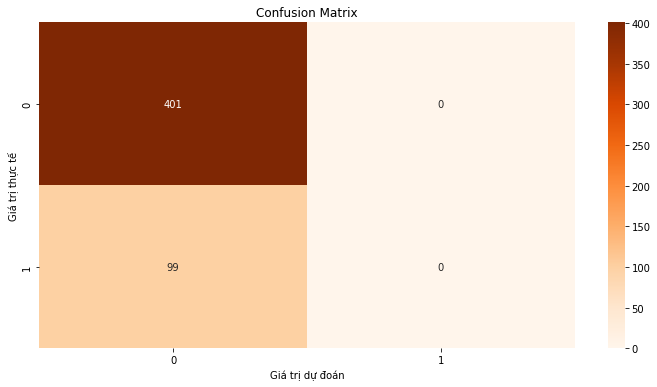

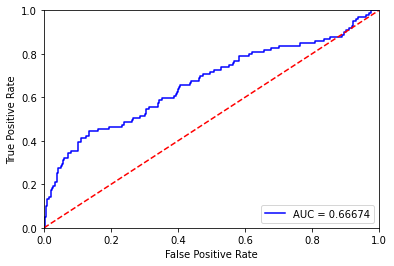

In [17]:
#-----------------------------------------------------------------------------
print("-------------------------Sau khi Xử lí dữ liệu-----------------------------")
pipeline_svm = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=6)),
                    ('svc', SVC(kernel= 'linear',probability=True))])
#Huấn luyện
pipeline_svm.fit(X_train, y_train)
#Test
y_pred2 = pipeline_svm.predict(X_test)

print("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred2)))
    
#Confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực tế")
plt.xlabel("Giá trị dự đoán")
plt.show()
    
#ROC
y_pred_proba = pipeline_svm.predict_proba(X_test)[::,1]

fpr, tpr, _ =roc_curve(y_test,  y_pred_proba)
plot = auc(fpr, tpr)
#create ROC curve
plt.plot(fpr,tpr,'b',label = 'AUC = %0.5f' % plot)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [16]:
import openpyxl

path = 'Kết Quả.xlsx'
kq = pd.read_excel(path, sheet_name = "SVM")
row = kq.shape[0]

workbook = openpyxl.load_workbook(path);

add = pd.DataFrame({
    'Lần thứ' : [row+1],
    'Kết quả' : [accuracy_score(y_test,y_pred2)]
})


with pd.ExcelWriter(path,mode="a",engine="openpyxl",if_sheet_exists="overlay") as writer:
    add.to_excel(writer, sheet_name="SVM",header=None, startrow=row+1,index=False)

kq = pd.read_excel(path, sheet_name = "SVM")
kq




,Lần thứ,Kết quả
0,1,0.774
1,2,0.270
2,3,0.666
3,4,0.564
4,5,0.768
5,6,0.778
6,7,0.672
7,8,0.814
8,9,0.772
9,10,0.674
